# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from itertools import combinations
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
lat = []
lon=[]
temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_list = []

#count records and set numbers
record_num = 0
set_num = 1

In [5]:
print('''
Beginning Data Retrieval     
-----------------------------
''')   

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_num ==50:
            set_num += 1
            record_num = 1 
            city_list.append(city)
        
        else:
            record_num += 1 
            city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city} ")
    
    except (KeyError,IndexError):
        print ("City not found. Skipping...")
        
print('''
Data Retrieval Complete    
-----------------------------
''')  
    


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of Set 1 | bredasdorp 
Processing Record 2 of Set 1 | ndioum 
Processing Record 3 of Set 1 | mazagao 
Processing Record 4 of Set 1 | arraial do cabo 
Processing Record 5 of Set 1 | salinas 
Processing Record 6 of Set 1 | ushuaia 
Processing Record 7 of Set 1 | morro bay 
Processing Record 8 of Set 1 | brandon 
Processing Record 9 of Set 1 | cuamba 
Processing Record 10 of Set 1 | weihai 
Processing Record 11 of Set 1 | channel-port aux basques 
Processing Record 12 of Set 1 | nizhniy kuranakh 
Processing Record 13 of Set 1 | punta arenas 
Processing Record 14 of Set 1 | verkhnyaya toyma 
Processing Record 15 of Set 1 | vardo 
Processing Record 16 of Set 1 | victoria 
Processing Record 17 of Set 1 | ridgecrest 
Processing Record 18 of Set 1 | avarua 
City not found. Skipping...
Processing Record 19 of Set 1 | hami 
Processing Record 20 of Set 1 | rikitea 
Processing Record 21 of Set 1 | caconda 
Processing

Processing Record 33 of Set 4 | bartlesville 
Processing Record 34 of Set 4 | margate 
Processing Record 35 of Set 4 | valparaiso 
Processing Record 36 of Set 4 | cranbourne 
Processing Record 37 of Set 4 | nemuro 
Processing Record 38 of Set 4 | gat 
Processing Record 39 of Set 4 | podor 
Processing Record 40 of Set 4 | upernavik 
Processing Record 41 of Set 4 | roald 
Processing Record 42 of Set 4 | doha 
Processing Record 43 of Set 4 | sandy bay 
Processing Record 44 of Set 4 | palmerston 
Processing Record 45 of Set 4 | baylo 
City not found. Skipping...
Processing Record 46 of Set 4 | nikolskoye 
Processing Record 47 of Set 4 | monrovia 
Processing Record 48 of Set 4 | saint-joseph 
Processing Record 49 of Set 4 | hofn 
Processing Record 50 of Set 4 | tapes 
Processing Record 1 of Set 5 | dikson 
Processing Record 2 of Set 5 | hithadhoo 
Processing Record 3 of Set 5 | roma 
Processing Record 4 of Set 5 | mahebourg 
Processing Record 5 of Set 5 | awjilah 
Processing Record 6 of Set

Processing Record 19 of Set 8 | havelock 
Processing Record 20 of Set 8 | mazyr 
Processing Record 21 of Set 8 | aklavik 
City not found. Skipping...
Processing Record 22 of Set 8 | nadvoitsy 
Processing Record 23 of Set 8 | surt 
City not found. Skipping...
Processing Record 24 of Set 8 | karwar 
Processing Record 25 of Set 8 | benguela 
Processing Record 26 of Set 8 | rio grande 
Processing Record 27 of Set 8 | nara 
Processing Record 28 of Set 8 | greencastle 
Processing Record 29 of Set 8 | dasoguz 
Processing Record 30 of Set 8 | hovd 
Processing Record 31 of Set 8 | brookhaven 
Processing Record 32 of Set 8 | fez 
Processing Record 33 of Set 8 | fortuna 
Processing Record 34 of Set 8 | hastings 
Processing Record 35 of Set 8 | sandwick 
Processing Record 36 of Set 8 | mungaa 
Processing Record 37 of Set 8 | padang 
Processing Record 38 of Set 8 | henties bay 
City not found. Skipping...
Processing Record 39 of Set 8 | koundara 
Processing Record 40 of Set 8 | bima 
Processing Rec

Processing Record 46 of Set 11 | kawalu 
Processing Record 47 of Set 11 | suntar 
Processing Record 48 of Set 11 | husavik 
City not found. Skipping...
Processing Record 49 of Set 11 | lamar 
Processing Record 50 of Set 11 | chimbote 
Processing Record 1 of Set 12 | pevek 
Processing Record 2 of Set 12 | sorland 
Processing Record 3 of Set 12 | kirakira 
City not found. Skipping...
Processing Record 4 of Set 12 | schitu-duca 

Data Retrieval Complete    
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#create dictionary to dreate data frame
city_dict = {
    "City": city_list,
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": clouds, 
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date }
    
#create data frame
city_dict= pd.DataFrame(city_dict)

In [15]:
#export the city data into a .csv.
city_dict.to_csv("cities.csv", index=False)

In [16]:
#print dataframe
city_df= pd.DataFrame(city_dict)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,43.92,93,5,5.75,ZA,1627707097
1,ndioum,16.5129,-14.6471,80.42,68,86,14.63,SN,1627707097
2,mazagao,-0.1150,-51.2894,82.45,96,39,1.95,BR,1627707098
3,arraial do cabo,-22.9661,-42.0278,63.82,64,87,15.26,BR,1627707098
4,salinas,36.6777,-121.6555,65.57,85,90,11.50,US,1627707086
...,...,...,...,...,...,...,...,...,...
549,chimbote,-9.0853,-78.5783,64.69,83,90,8.28,PE,1627707343
550,pevek,69.7008,170.3133,33.37,86,100,1.88,RU,1627707344
551,sorland,67.6670,12.6934,48.51,75,100,25.50,NO,1627707344
552,kirakira,-10.4544,161.9205,79.86,80,88,8.50,SB,1627707344


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

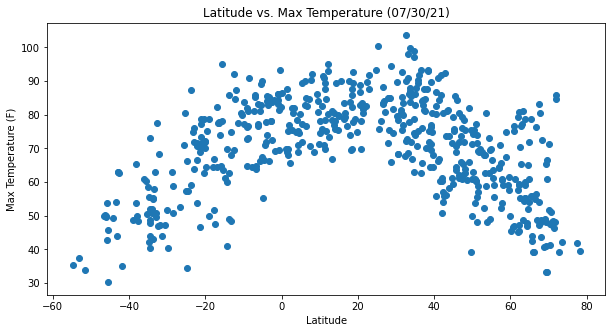

In [17]:
latitude = city_dict['Lat']
temperature = city_dict['Max Temp']

plt.figure(figsize=[10,5])

# Plot the lat vs the max temp
plt.scatter(x = latitude, y = temperature)

# Add labeling
# This extracts the date and returns it in the local time zone
# lat_time_plt = datetime.fromtimestamp(city_dict.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
# plt.xlim(-80,100)
# plt.ylim(min(temperature) - 10 , max(temperature) +10)
plt.show()

## Latitude vs. Humidity Plot

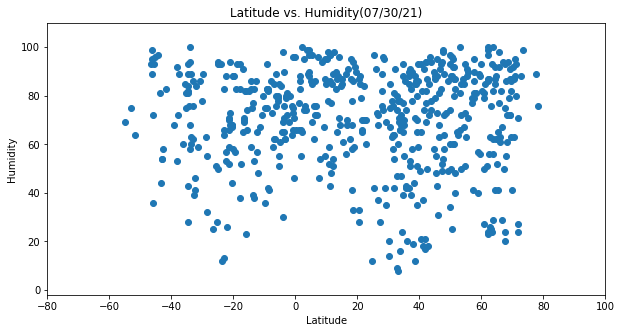

In [18]:

plt.figure(figsize=(10,5));

# Plot the lat vs humidity
plt.scatter(x = city_dict['Lat'], y = city_dict['Humidity']);

# Add labeling
# This extracts the date and returns it in the local time zone
plt.title(f"Latitude vs. Humidity({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Humidity");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(humidity) - 10 , max(humidity) +10);
plt.show()

## Latitude vs. Cloudiness Plot

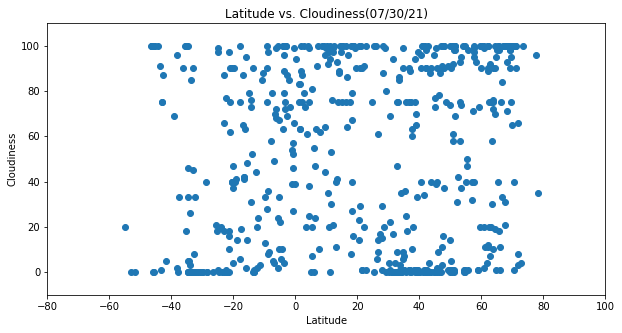

In [19]:
plt.figure(figsize=(10,5));

# Plot the lat vs Cloudiness
plt.scatter(x = city_dict['Lat'], y = city_dict['Cloudiness']);

# Add labeling
# This extracts the date and returns it in the local time zone

plt.title(f"Latitude vs. Cloudiness({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.show()

## Latitude vs. Wind Speed Plot

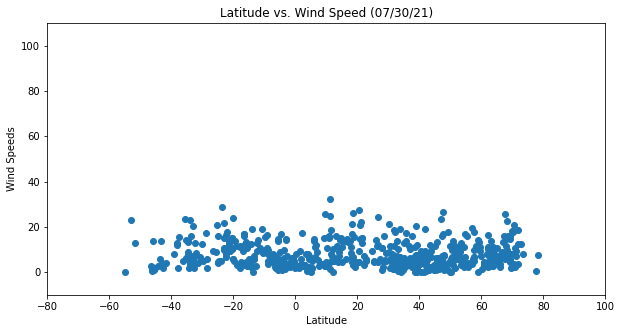

In [20]:
plt.figure(figsize=(10,5));

# Plot the lat vs Wind
plt.scatter(x = city_dict['Lat'], y = city_dict['Wind Speed']);

# Add labeling
plt.title(f"Latitude vs. Wind Speed ({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Wind Speeds");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.00011318267974730216


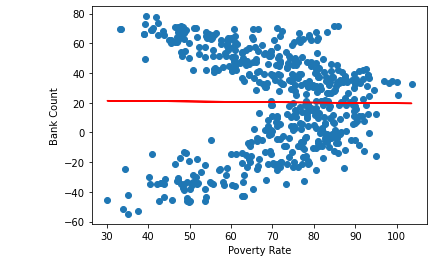

In [21]:
## Convert to floats and store x and y values
x_values = city_dict['Max Temp'].astype('float')
y_values = city_dict['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression